**PLANET DATASET: UNDERSTANDING THE AMAZON FROM SPACE**

In [14]:

# Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.image import imread
%matplotlib inline
from os import listdir
from numpy import zeros
from numpy import asarray
from numpy import savez_compressed
from pandas import read_csv
from keras import backend
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import os
import time
from sklearn.metrics import fbeta_score
import tensorflow as tf
from keras.optimizers import SGD
import sys
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
print("hello")

hello


In [15]:
# Libraries for loading models

from tensorflow.keras.models import load_model

In [ ]:
# Libraries for train-test-split

from sklearn.model_selection import train_test_split

In [17]:
# Loading the train and test datasets

train_sets = pd.read_csv('../input/planets-dataset/planet/planet/train_classes.csv')
test_imgsets = '../input/planets-dataset/planet/planet/test-jpg/'
train_imgsets = '../input/planets-dataset/planet/planet/train-jpg/'

In [18]:

train_sets

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
...,...,...
40474,train_40474,clear primary
40475,train_40475,cloudy
40476,train_40476,agriculture clear primary
40477,train_40477,agriculture clear primary road


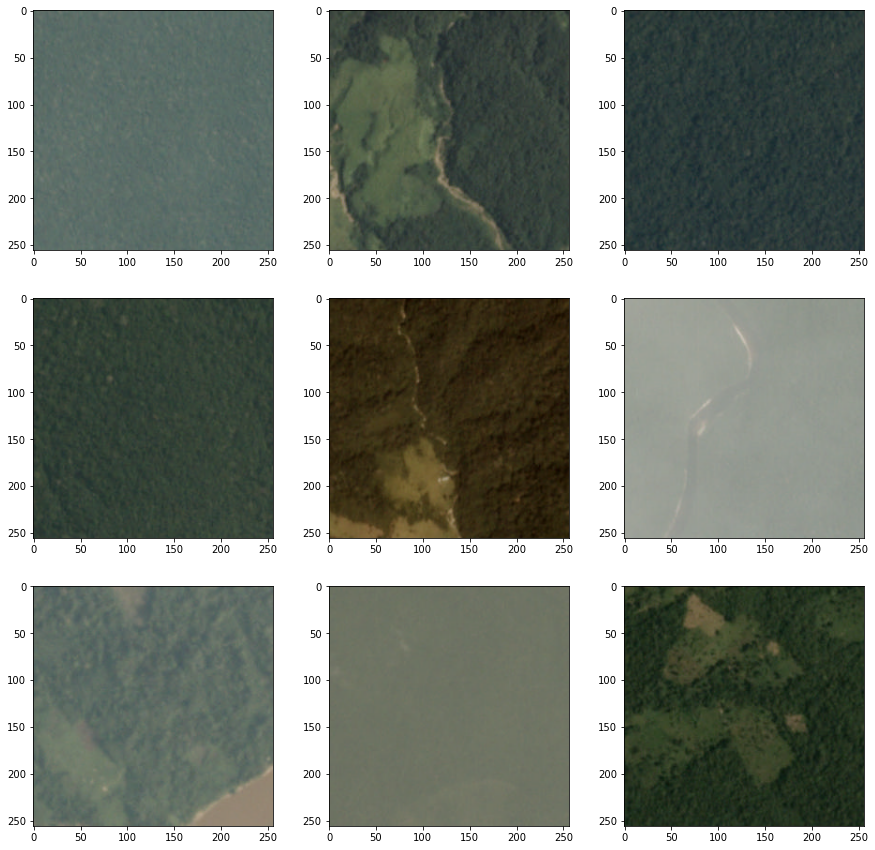

In [19]:
# View the first 9 train images from the Planet Dataset

plt.figure(figsize=( 15 , 15 ))

folder = 'planet/train-jpg/'

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    
    # Define File
    file = train_imgsets + 'train_' + str(i) + '.jpg'
    
    # Load image pixel
    image = imread(file)
    
    # Plot pixel data
    pyplot.imshow(image)
    
plt.show()


In [20]:
# Remove the individual tags from the train_datasets by spltting with empty strings

sets_list = []
for tag in train_sets.tags.values:
    dataset = tag.split(" ")
    for dset in dataset:
        if dset not in sets_list:
            sets_list.append(dset)
            
# length of dataset

len(sets_list)

17

In [ ]:
# Ordering datasets in strings 
sets_list.sort()

In [52]:
# Create a mapping of files to tags

def map_files(mapping_csv):
    mapping = dict()
    for i in range(len(mapping_csv)):
        name, tags = mapping_csv['image_name'][i], mapping_csv['tags'][i]
        mapping[name] = tags.split(' ')
    return mapping

file_mapping = map_files(train_datasets)

# Creating a one hot encoding

def encode_one_hot(tags, mapping):
    
    #creating empty vector
    encoding = np.zeros(len(mapping), dtype = 'uint8')
    
    #mark 1 for each tag in the vector
    for tag in tags:
        encoding[mapping[tag]] = 1
    return encoding 








# creation of tag_datsets
tag_maps = {m:sets_list[m] for m in range(len(sets_list))}

print (tag_maps)

# # Create a mapping of files to tags

def file_map(csv_file):
    mapd = dict()
    for i in range(len(csv_file)):
        name, tags = csv_file['image_name'][i], csv_file['tags'][i]
        mapd[name] = tags.split(' ')
    return mapd

file_mapping = file_map(train_sets)

# one hot encoding crreation

def one_hot_encode (tags, mapd):
    encoding = np.zeros(len(mapd), dtype = 'uint8')

    for tag in tags:
        encoding[mapd[tag]] = 1
    return encoding 

{0: 'haze', 1: 'primary', 2: 'agriculture', 3: 'clear', 4: 'water', 5: 'habitation', 6: 'road', 7: 'cultivation', 8: 'slash_burn', 9: 'cloudy', 10: 'partly_cloudy', 11: 'conventional_mine', 12: 'bare_ground', 13: 'artisinal_mine', 14: 'blooming', 15: 'selective_logging', 16: 'blow_down'}


In [53]:
def load_dataset(path, file_mapping, tag_maps):
    pictures = list()
    targets = list()
    
# For files in the directory
    for file in os.listdir(train_imgsets):
        
        # Load images
        picture = load_img(path + file, target_size=(64,64))
        
        # Converting to numpy array
        picture = img_to_array(picture, dtype='uint8')
    
        # Tags
        tags = file_mapping[file[:-4]]
        
        # One hot encode tags
        target = one_hot_encode(tags, tag_maps)
        
        #Embedding pictures & targets
        pictures.append(picture)
        targets.append(target)
        
    X = np.asarray(pictures,dtype='uint8')
    Y = np.asarray(targets,dtype='uint8')
    return X,Y

X, Y = load_dataset(train_imgsets, file_mapping, tag_maps)
print(X.shape, Y.shape)

# Making compressions of the arrays
np.savez_compressed('planet_data.npz', X, Y)



# Preparing the image dataset

# Load the images
def load_dataset(path, file_mapping, tag_mappings):
    photos = list()
    targets = list()
    
# For files in the directory
    for file in os.listdir(train_image_datasets):
        
        # Load images
        photo = load_img(path + file, target_size=(64,64))
        
        # Converting to numpy array
        photo = img_to_array(photo, dtype='uint8')
        
        # Tags
        tags = file_mapping[file[:-4]]
        
        # One hot encode tags
        target = encode_one_hot(tags, tag_mappings)
        
        #stores
        photos.append(photo)
        targets.append(target)
        
    X = np.asarray(photos,dtype='uint8')
    Y = np.asarray(targets,dtype='uint8')
    return X,Y

X, Y = load_dataset(train_image_datasets, file_mapping, tag_mappings)
print(X.shape, Y.shape)

# Compressing X and Y arrays into one single file
np.savez_compressed('planet_data.npz', X, Y)

KeyError: 'clear'

In [ ]:


# Creating tag_datasets and inverse_datasets_map

tag_mappings = {sets_list[i]: i for i in range(len(sets_list))}

inverse_datasets_map = {i:datasets_list[i] for i in range(len(datasets))}

# Create a mapping of files to tags

def map_files(mapping_csv):
    mapping = dict()
    for i in range(len(mapping_csv)):
        name, tags = mapping_csv['image_name'][i], mapping_csv['tags'][i]
        mapping[name] = tags.split(' ')
    return mapping

file_mapping = map_files(train_datasets)

# Creating a one hot encoding

def encode_one_hot(tags, mapping):
    
    #creating empty vector
    encoding = np.zeros(len(mapping), dtype = 'uint8')
    
    #mark 1 for each tag in the vector
    for tag in tags:
        encoding[mapping[tag]] = 1
    return encoding 

# Preparing the image dataset

# Load the images
def load_dataset(path, file_mapping, tag_mappings):
    photos = list()
    targets = list()
    
# For files in the directory
    for file in os.listdir(train_image_datasets):
        
        # Load images
        photo = load_img(path + file, target_size=(64,64))
        
        # Converting to numpy array
        photo = img_to_array(photo, dtype='uint8')
        
        # Tags
        tags = file_mapping[file[:-4]]
        
        # One hot encode tags
        target = encode_one_hot(tags, tag_mappings)
        
        #stores
        photos.append(photo)
        targets.append(target)
        
    X = np.asarray(photos,dtype='uint8')
    Y = np.asarray(targets,dtype='uint8')
    return X,Y

X, Y = load_dataset(train_image_datasets, file_mapping, tag_mappings)
print(X.shape, Y.shape)

# Compressing X and Y arrays into one single file
np.savez_compressed('planet_data.npz', X, Y)



In [50]:
# Load dataset

data = np.load('./planet_data.npz')
X,Y = data['arr_0'], data['arr_1']
print('load_dataset: ', X.shape, Y.shape)

X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.3, random_state = 42)
print('shapes: ', X_train.shape, X_val.shape, Y_val.shape)

FileNotFoundError: [Errno 2] No such file or directory: './planet_data.npz'

In [49]:
def fBeta (Y_truth, Y_predicted, beta=2):
    
    #clip predictors
    Y_predict = backend.clip(Y_predicted, 0, 1)
    
    #Calculating elements
    tp = backend.sum(backend.round(backend.clip(y_truth * Y_predicted, 0, 1)), axis=1)
    fp = backend.sum(backend.round(backend.clip(y_truth - Y_predicted, 0, 1)), axis=1)
    fn = backend.sum(backend.round(backend.clip(y_truth - Y_predicted, 0, 1)), axis=1)
    
    #Precision Calculation
    precision = tp / (tp + fp + backend.epsilon())
    
    #Recall Calculation
    recall = tp / (tp + fn + backend.epsilon())
    
    #Calculate fbeta, averaged across each class
    betaP = beta ** 2
    fBeta_score = backend.mean(1 + betaP) * (precision * recall) / (betaP * precision * recall + backend.epsilon())
    
    return fBeta_score

In [ ]:
# LAYER FLATENNING 
model_planet.add(tf.keras.layers.Flatten())
#LAYER 1
model_planet.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
#LAYER 2
model_planet.add(tf.keras.layers.Dense(17, activation='sigmoid'))

In [48]:
 #MODEL INITIATION
model_planet = tf.keras.models.Sequential()
model_planet.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=[64, 64, 3]))
model_planet.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_planet.add(tf.keras.layers.MaxPool2D(2,2))
#LAYER 2
model_planet.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_planet.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_planet.add(tf.keras.layers.MaxPool2D(2,2))
#LAYER 3
model_planet.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_planet.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_planet.add(tf.keras.layers.MaxPool2D(2,2))

In [ ]:
# Created model compilation
opt = SGD(lr=0.01, momentum=0.9)
model_planet.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
# Plot learning curves
def summerize_diagostics(history):
    
    #plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='green', label='train')
    plt.plot(history.history['val_loss'], color='purple', label='test')
    
    #plot accuracy
    plt.subplot(212)
    plt.title('Fbeta')
    plt.plot(history.history['fbeta'], color='yellow', label='train')
    plt.plot(history.history['val_fbeta'], color='red', label='test')
    
    #save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.close()

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

In [ ]:
def model_building ():
    model = Sequential()
    model.add(Conv2D(filters=128, kernel_size=3, input_shape=(128, 128, 3)))
    model.add(Flatten())
    model.add(Dense(17, activation='sigmoid'))
    opt = Adam(lr=1e-2)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[multi_label_acc, fbeta])
    
    return model

In [ ]:
train_datasets

In [ ]:
train_sets['image_name'] = train_sets['image_name'].apply(lambda x: x[:-4])
train_sets.head()

In [ ]:
train_sets.to_csv('submission.csv', index=False, header=1)